# Refine results with dataframes

# 1. CO2=0, MinCapReq=1, UCommit=0 no LDS

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

In [3]:


path_cwd = os.getcwd()
full_series_results_folder = "results_TDR_28_01_11.03am_MinCAP=1_LDS=1"

# outputs_path = joinpath(run_results_folder, string( string("_CO2=", CO2), string("_MinCapReq=",mincap), string("_COMMIT=", commit), string("_epsilon=", eps), string("_V",repetition, "INFEASIBLE")))
# CO2Cap = [0, 1, 2]
# UCommit = [0, 1]
# MinCapReq = [0, 1]
# max_repetition = 5
# epsilon_values = [0.001 , 0.02559659, 0.04404403, 0.08093892,  0.10553551, 0.12398295, 0.1424304, 0.16087784, 0.19162358, 0.23466761, 0.27771164, 0.31460653, 
# 0.38224715, 0.57974331, 0.78987166, 1.0]

# Timesteps_per_period = [48, 168, 672]
UseExtremePeriods =[1]
Timesteps_per_period = [48, 168, 672]

Timesteps_per_period = [48, 168, 672]
number_rep_period = {
    "48" : [8, 40, 80, 182],
    "168" : [8, 12, 24, 36, 48],
    "672" : [4, 8, 12]
    }
# number_rep_period = {
#     "48" : [4, 8, 40, 60, 80, 120, 140, 182],
#     "168": [4, 6, 8, 12, 20, 24, 36, 48],
#     "672": [2, 4, 6, 8, 10, 12]
# }

missing_paths = []
df_missing_folders = pd.DataFrame(columns=['number_rep_period', 'time_rep_period', 'ExtremePeriod'])
df_system_full_settings_results = pd.DataFrame(columns=['number_rep_period', 'time_rep_period', "ExtremePeriod", 'total_cost', 'Run_time', 'Time_Indexes', 'Build_model_time', 'write_outputs_time', 'termination_Status', 'has_primal'])

for time_rep_period in Timesteps_per_period:
    for extreme_period in UseExtremePeriods:
        for number_repr_period in number_rep_period[str(time_rep_period)]:            
            path_result = os.path.join(path_cwd, full_series_results_folder, f"_number_rep_period={number_repr_period}_time_rep_period={time_rep_period}_ExtremePeriod={extreme_period}")

            if os.path.exists(path_result):
                path_result_accuracy =  os.path.join(path_result, "epsilon_values.csv")
                df_result_accuracy = pd.read_csv(path_result_accuracy)
                df_system_one_settings_results_TDR = pd.DataFrame([{
                                'TDR_vs_rawdata': "TDR",
                                'number_rep_period': number_repr_period,
                                'time_rep_period': time_rep_period,
                                'ExtremePeriod': extreme_period,
                                'total_cost': df_result_accuracy["total_cost"].iloc[0],
                                'Run_time': df_result_accuracy["Run_time"].iloc[0],
                                'Time_Indexes': df_result_accuracy["Time_Indexes"].iloc[0],
                                'Build_model_time': df_result_accuracy["Build_model_time"].iloc[0],
                                'write_outputs_time': df_result_accuracy["write_outputs_time"].iloc[0],
                                'termination_Status': df_result_accuracy["termination_Status"].iloc[0],
                                'has_primal': df_result_accuracy["has_primal"].iloc[0]
                            }])
                df_system_one_settings_results_raw_data = pd.DataFrame([{
                                'TDR_vs_rawdata': "raw_data",
                                'number_rep_period': number_repr_period,
                                'time_rep_period': time_rep_period,
                                'ExtremePeriod': extreme_period,
                                'total_cost': df_result_accuracy["total_cost"].iloc[-1],
                                'Run_time': df_result_accuracy["Run_time"].iloc[-1],
                                'Time_Indexes': df_result_accuracy["Time_Indexes"].iloc[-1],
                                'Build_model_time': df_result_accuracy["Build_model_time"].iloc[-1],
                                'write_outputs_time': df_result_accuracy["write_outputs_time"].iloc[-1],
                                'termination_Status': df_result_accuracy["termination_Status"].iloc[-1],
                                'has_primal': df_result_accuracy["has_primal"].iloc[-1]
                            }])

                df_system_full_settings_results = pd.concat([df_system_full_settings_results, df_system_one_settings_results_TDR, df_system_one_settings_results_raw_data], axis=0)

            else:
                print("Missing file with path {}".format(path_result))
                missing_paths.append(path_result)
                df_system_one_settings_results = pd.DataFrame({
                                'number_rep_period': [number_repr_period],
                                'time_rep_period': [time_rep_period],
                                'ExtremePeriod': [extreme_period],
                            })

                df_missing_folders = pd.concat([df_missing_folders, df_system_one_settings_results], axis=0)

# Remove unsuccessfull runs 
df_system_full_settings_results = df_system_full_settings_results[df_system_full_settings_results["Run_time"] >0]

C:\Users\Diego\AppData\Local\Temp\ipykernel_10644\3211767016.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_system_full_settings_results = pd.concat([df_system_full_settings_results, df_system_one_settings_results_TDR, df_system_one_settings_results_raw_data], axis=0)


In [4]:
df_system_full_settings_results

,number_rep_period,time_rep_period,ExtremePeriod,total_cost,Run_time,Time_Indexes,Build_model_time,write_outputs_time,termination_Status,has_primal,TDR_vs_rawdata
0,8,48,1,5.620981e+09,0.482786,384,0.401923,0.507251,termination_status,True,TDR
0,8,48,1,6.370388e+09,7.109000,8760,56.596203,4.201691,termination_status,True,raw_data
0,40,48,1,5.807082e+09,2.411753,1920,3.257648,1.529325,termination_status,True,TDR
0,40,48,1,6.516038e+09,7.040000,8760,59.578596,4.481450,termination_status,True,raw_data
0,80,48,1,6.014177e+09,6.155272,3840,12.726594,2.415480,termination_status,True,TDR
0,80,48,1,6.015481e+09,6.535000,8760,59.011879,4.275097,termination_status,True,raw_data
0,182,48,1,6.013598e+09,15.304756,8736,54.067560,5.595032,termination_status,True,TDR
0,182,48,1,6.015423e+09,7.342000,8760,59.268783,6.977978,termination_status,True,raw_data
0,8,168,1,5.848915e+09,1.604563,1344,1.756266,1.266468,termination_status,True,TDR
0,8,168,1,6.356202e+09,7.031000,8760,57.851111,4.298245,termination_status,True,raw_data


In [5]:
path_cwd = os.getcwd()
results_folder = os.path.join(path_cwd, full_series_results_folder)
csv_file_path = os.path.join(results_folder, "results_TDR_run_CO2=0_MinCap=1_UCommit=0_raw_&_TDR.csv")
df_system_full_settings_results.reset_index().to_csv(csv_file_path, index=False)

csv_file_path = os.path.join(results_folder, "missing_runs_TDR_run_44cases.csv")
df_missing_folders.to_csv(csv_file_path, index=False)

- The above 2 files are missing because when activating the ExtremePeriod setting, the Ncluster = number_rep_period - number_extreme_period. If number_extreme_period > number_rep_period, Ncluster turns negative. 

In [91]:
# Add the ground truth results please

path_cwd = os.getcwd()
full_series_results_folder = "results_19_01_6.43pm_16_epsilon_version"

# outputs_path = joinpath(run_results_folder, string( string("_CO2=", CO2), string("_MinCapReq=",mincap), string("_COMMIT=", commit), string("_epsilon=", eps), string("_V",repetition, "INFEASIBLE")))
CO2Cap = [0]
UCommit = [0]
MinCapReq = [1]
max_repetition = 1
epsilon_values = [0.001]

missing_paths = []
df_system_full_settings_results_ground_truth = pd.DataFrame(columns=['number_rep_period', 'time_rep_period', "ExtremePeriod", 'total_cost', 'Run_time', 'Time_Indexes', 'Build_model_time', 'write_outputs_time', 'termination_Status', 'has_primal'])

for CO2 in CO2Cap:
    for mincap in MinCapReq:
        for commit in UCommit:
            for eps in epsilon_values:
                for repetition in range(1, max_repetition+1, 1):
                    
                    path_result = os.path.join(path_cwd, full_series_results_folder, f"_CO2={CO2}_MinCapReq={mincap}_COMMIT={commit}_epsilon={eps}_V{repetition}")

                    if os.path.exists(path_result):
                        path_result_accuracy =  os.path.join(path_result, "epsilon_values.csv")
                        df_result_accuracy = pd.read_csv(path_result_accuracy)
                        df_system_one_settings_results = pd.DataFrame({
                                        'number_rep_period': 8760,
                                        'time_rep_period': 1,
                                        'ExtremePeriod': 2,
                                        'total_cost': df_result_accuracy["total_cost"],
                                        'Run_time': df_result_accuracy["Run_time"],
                                        'Time_Indexes': df_result_accuracy["Time_Indexes"],
                                        'Build_model_time': df_result_accuracy["Build_model_time"],
                                        'write_outputs_time': df_result_accuracy["write_outputs_time"],
                                        'termination_Status': df_result_accuracy["termination_Status"],
                                        'has_primal': df_result_accuracy["has_primal"]
                                    })

                        df_system_full_settings_results_ground_truth = pd.concat([df_system_full_settings_results_ground_truth, df_system_one_settings_results], axis=0)

                    else:
                        print("Missing file with path {}".format(path_result))
                        missing_paths.append(path_result)
                        df_system_one_settings_results = pd.DataFrame({
                                        'number_rep_period': [number_repr_period],
                                        'time_rep_period': [time_rep_period],
                                        'ExtremePeriod': [extreme_period],
                                    })

                        df_missing_folders = pd.concat([df_missing_folders, df_system_one_settings_results], axis=0)

df_system_full_settings_results_ground_truth.reset_index(inplace=True)
# Update the first row of specific columns with the mean of those columns
df_system_full_settings_results_ground_truth.loc[0, "total_cost"] = df_system_full_settings_results_ground_truth["total_cost"].mean()
df_system_full_settings_results_ground_truth.loc[0, "Run_time"] = df_system_full_settings_results_ground_truth["Run_time"].mean()
df_system_full_settings_results_ground_truth.loc[0, "Build_model_time"] = df_system_full_settings_results_ground_truth["Build_model_time"].mean()
df_system_full_settings_results_ground_truth.loc[0, "write_outputs_time"] = df_system_full_settings_results_ground_truth["write_outputs_time"].mean()

df_system_full_settings_results = pd.concat([df_system_full_settings_results, df_system_full_settings_results_ground_truth.loc[0].to_frame().T], axis=0)

C:\Users\Diego\AppData\Local\Temp\ipykernel_11128\734756002.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_system_full_settings_results_ground_truth = pd.concat([df_system_full_settings_results_ground_truth, df_system_one_settings_results], axis=0)


In [8]:
df_system_full_settings_results.head(3)

,number_rep_period,time_rep_period,ExtremePeriod,total_cost,Run_time,Time_Indexes,Build_model_time,write_outputs_time,termination_Status,has_primal,TDR_vs_rawdata
0,8,48,1,4.528966e+09,0.370910,384,0.240338,0.884951,termination_status,True,TDR
0,8,48,1,4.528966e+09,0.370910,384,0.240338,0.884951,termination_status,True,raw_data
0,40,48,1,4.733603e+09,3.286034,1920,3.184138,1.543215,termination_status,True,TDR


In [93]:
path_cwd = os.getcwd()
full_series_results_folder = "results_TDR_27_01_8.03pm"
results_folder = os.path.join(path_cwd, full_series_results_folder)
csv_file_path = os.path.join(results_folder, "results_TDR_run_44cases.csv")
df_system_full_settings_results.reset_index().to_csv(csv_file_path, index=False)

csv_file_path = os.path.join(results_folder, "missing_runs_TDR_run_44cases.csv")
df_missing_folders.to_csv(csv_file_path, index=False)

# Plot the total cost vs run_time for each GenX setting

In [97]:
df_system_full_settings_results

,number_rep_period,time_rep_period,ExtremePeriod,total_cost,Run_time,Time_Indexes,Build_model_time,write_outputs_time,termination_Status,has_primal,index
0,4,48,0,4368265476.389097,1.260619,192,9.439615,18.8132,termination_status,True,NaN
0,8,48,0,4356787667.553448,0.54622,384,0.267698,0.664188,termination_status,True,NaN
0,40,48,0,4836603372.017895,3.01435,1920,3.998335,1.570906,termination_status,True,NaN
0,60,48,0,4724117580.540975,6.311009,2880,7.059709,2.007659,termination_status,True,NaN
0,80,48,0,4758452216.21227,6.107711,3840,11.280848,2.588384,termination_status,True,NaN
0,120,48,0,4861392062.368611,10.924712,5760,22.894992,4.476194,termination_status,True,NaN
0,140,48,0,4852458774.581174,12.794145,6720,31.722246,4.677865,termination_status,True,NaN
0,182,48,0,4862443919.064351,21.873924,8736,51.645201,5.481497,termination_status,True,NaN
0,8,48,1,4528965938.223505,0.37091,384,0.240338,0.884951,termination_status,True,NaN
0,40,48,1,4733603329.495134,3.286034,1920,3.184138,1.543215,termination_status,True,NaN


In [ ]:
grouped = df_system_full_settings_results.groupby(by=["time_rep_period"])

fig, ax = plt.subplots(3, 2, figsize=(12, 6))

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            ax[0, 0].plot(
            group_df_extreme["Run_time"], 
            group_df_extreme["total_cost"], 
            marker='o', linestyle='-', 
            label=f"time_rep_period {group_name[0]}"
            )

            ax[0, 1].plot(
            group_df_extreme["Run_time"], 
            group_df_extreme["total_cost"], 
            marker='o', linestyle='-', 
            label=f"time_rep_period {group_name[0]}"
            )
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[0, i].plot(
                group_df_ordered["Run_time"], 
                group_df_ordered["total_cost"], 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name[0]}"
            )
    
            ax[0, i].set_xlabel('Run time [s]')
            ax[0, i].set_ylabel('Total Cost')
            ax[0, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[0, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[0, i].legend()
            ax[0, i].grid()

plt.tight_layout()
plt.show()


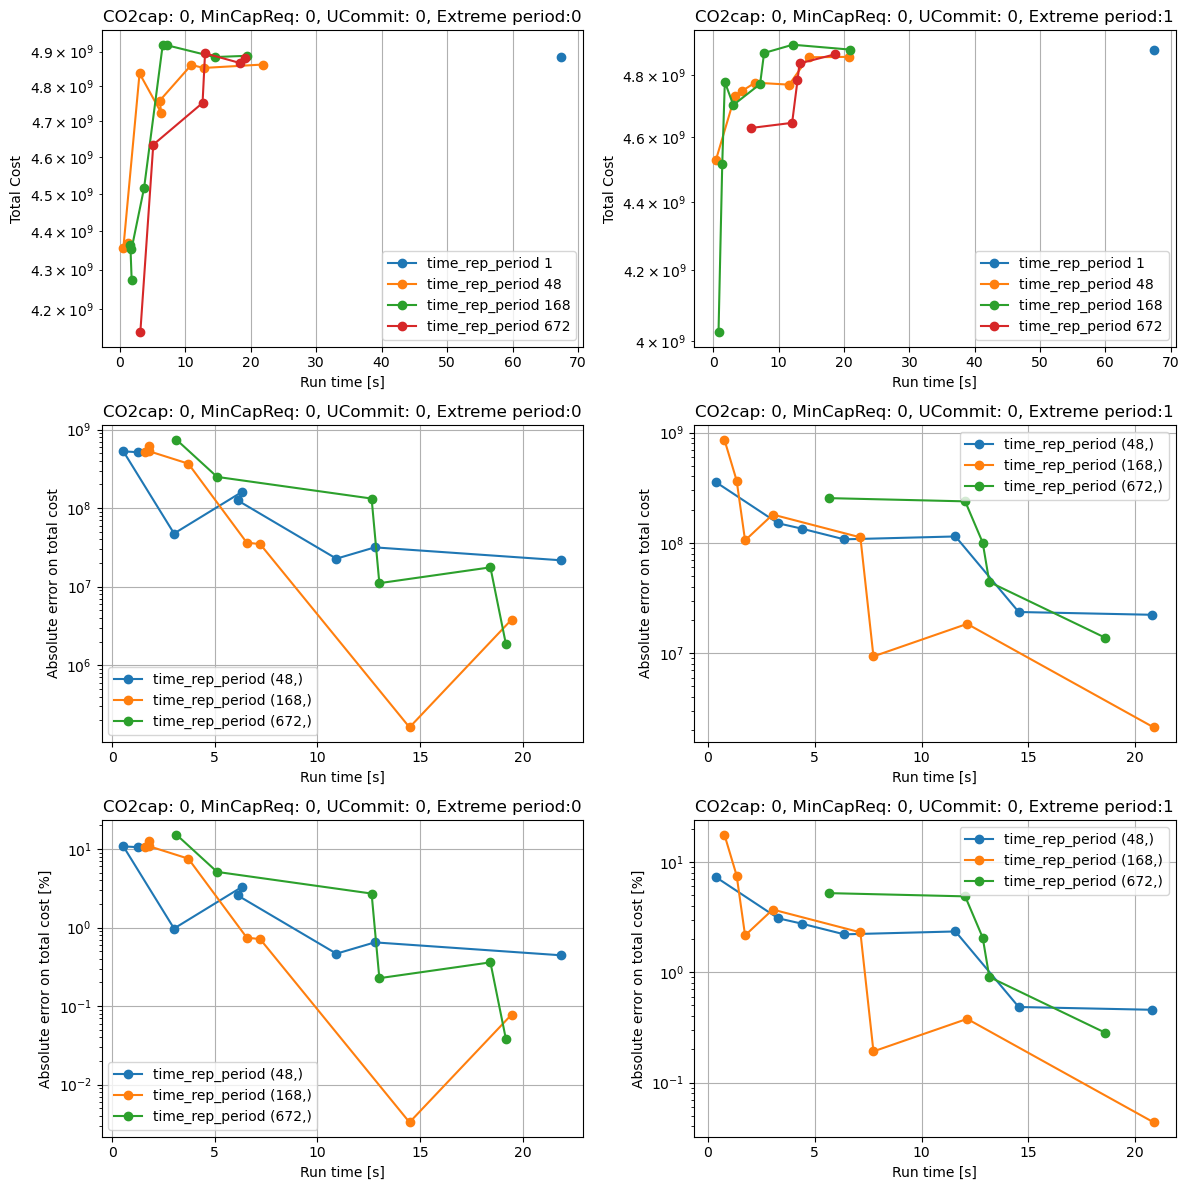

In [135]:
grouped = df_system_full_settings_results.groupby(by=["time_rep_period"])

fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            ax[0, 0].plot(
            group_df_extreme["Run_time"], 
            group_df_extreme["total_cost"], 
            marker='o', linestyle='-', 
            label=f"time_rep_period {group_name[0]}"
            )

            ax[0, 1].plot(
            group_df_extreme["Run_time"], 
            group_df_extreme["total_cost"], 
            marker='o', linestyle='-', 
            label=f"time_rep_period {group_name[0]}"
            )
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[0, i].plot(
                group_df_ordered["Run_time"], 
                group_df_ordered["total_cost"], 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name[0]}"
            )
    
            ax[0, i].set_xlabel('Run time [s]')
            ax[0, i].set_ylabel('Total Cost')
            ax[0, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[0, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[0, i].legend()
            ax[0, i].grid()

total_cost_ground_truth = df_system_full_settings_results[df_system_full_settings_results["time_rep_period"] == 1]["total_cost"]

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            continue
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[1, i].plot(
                group_df_ordered["Run_time"], 
                np.abs(group_df_ordered["total_cost"]-total_cost_ground_truth), 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name}"
            )
    
            ax[1, i].set_xlabel('Run time [s]')
            ax[1, i].set_ylabel('Absolute error on total cost')
            ax[1, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[1, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[1, i].legend()
            ax[1, i].grid()

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            continue
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[2, i].plot(
                group_df_ordered["Run_time"], 
                np.abs(group_df_ordered["total_cost"]-total_cost_ground_truth)/total_cost_ground_truth*100, 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name}"
            )
    
            ax[2, i].set_xlabel('Run time [s]')
            ax[2, i].set_ylabel('Absolute error on total cost [%]')
            ax[2, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[2, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[2, i].legend()
            ax[2, i].grid()

plt.tight_layout()
plt.show()


# 2. CO2cap=0, MinCapReq=1, UCommit=0, LDS=1

In [156]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

In [157]:


path_cwd = os.getcwd()
full_series_results_folder = "results_TDR_28_01_11.03am_MinCAP=1_LDS=1"

# outputs_path = joinpath(run_results_folder, string( string("_CO2=", CO2), string("_MinCapReq=",mincap), string("_COMMIT=", commit), string("_epsilon=", eps), string("_V",repetition, "INFEASIBLE")))
# CO2Cap = [0, 1, 2]
# UCommit = [0, 1]
# MinCapReq = [0, 1]
# max_repetition = 5
# epsilon_values = [0.001 , 0.02559659, 0.04404403, 0.08093892,  0.10553551, 0.12398295, 0.1424304, 0.16087784, 0.19162358, 0.23466761, 0.27771164, 0.31460653, 
# 0.38224715, 0.57974331, 0.78987166, 1.0]

Timesteps_per_period = [48, 168, 672]
UseExtremePeriods =[0, 1]
number_rep_period = {
    "48" : [4, 8, 40, 60, 80, 120, 140, 182],
    "168": [4, 6, 8, 12, 20, 24, 36, 48],
    "672": [2, 4, 6, 8, 10, 12]
}

missing_paths = []
df_missing_folders = pd.DataFrame(columns=['number_rep_period', 'time_rep_period', 'ExtremePeriod'])
df_system_full_settings_results = pd.DataFrame(columns=['number_rep_period', 'time_rep_period', "ExtremePeriod", 'total_cost', 'Run_time', 'Time_Indexes', 'Build_model_time', 'write_outputs_time', 'termination_Status', 'has_primal'])

for time_rep_period in Timesteps_per_period:
    for extreme_period in UseExtremePeriods:
        for number_repr_period in number_rep_period[str(time_rep_period)]:            
            path_result = os.path.join(path_cwd, full_series_results_folder, f"_number_rep_period={number_repr_period}_time_rep_period={time_rep_period}_ExtremePeriod={extreme_period}")

            if os.path.exists(path_result):
                path_result_accuracy =  os.path.join(path_result, "epsilon_values.csv")
                df_result_accuracy = pd.read_csv(path_result_accuracy)
                df_system_one_settings_results = pd.DataFrame({
                                'number_rep_period': number_repr_period,
                                'time_rep_period': time_rep_period,
                                'ExtremePeriod': extreme_period,
                                'total_cost': df_result_accuracy["total_cost"],
                                'Run_time': df_result_accuracy["Run_time"],
                                'Time_Indexes': df_result_accuracy["Time_Indexes"],
                                'Build_model_time': df_result_accuracy["Build_model_time"],
                                'write_outputs_time': df_result_accuracy["write_outputs_time"],
                                'termination_Status': df_result_accuracy["termination_Status"],
                                'has_primal': df_result_accuracy["has_primal"]
                            })

                df_system_full_settings_results = pd.concat([df_system_full_settings_results, df_system_one_settings_results], axis=0)

            else:
                print("Missing file with path {}".format(path_result))
                missing_paths.append(path_result)
                df_system_one_settings_results = pd.DataFrame({
                                'number_rep_period': [number_repr_period],
                                'time_rep_period': [time_rep_period],
                                'ExtremePeriod': [extreme_period],
                            })

                df_missing_folders = pd.concat([df_missing_folders, df_system_one_settings_results], axis=0)

# Remove unsuccessfull runs 
df_system_full_settings_results = df_system_full_settings_results[ df_system_full_settings_results["Run_time"] >0]

Missing file with path c:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\results_TDR_28_01_11.03am_MinCAP=1_LDS=1\_number_rep_period=4_time_rep_period=48_ExtremePeriod=1
Missing file with path c:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\results_TDR_28_01_11.03am_MinCAP=1_LDS=1\_number_rep_period=2_time_rep_period=672_ExtremePeriod=1


C:\Users\Diego\AppData\Local\Temp\ipykernel_11128\2208838034.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_system_full_settings_results = pd.concat([df_system_full_settings_results, df_system_one_settings_results], axis=0)


- The above 2 files are missing because when activating the ExtremePeriod setting, the Ncluster = number_rep_period - number_extreme_period. If number_extreme_period > number_rep_period, Ncluster turns negative. 

In [158]:
# Add the ground truth results please

path_cwd = os.getcwd()
full_series_results_missing_folder = "results_22_01_4.43pm_16_epsilon_missing_foldersv4"

# outputs_path = joinpath(run_results_folder, string( string("_CO2=", CO2), string("_MinCapReq=",mincap), string("_COMMIT=", commit), string("_epsilon=", eps), string("_V",repetition, "INFEASIBLE")))
CO2Cap = [0]
UCommit = [0]
MinCapReq = [1]
max_repetition = 5
epsilon_values = [0.001]

missing_paths = []
df_system_full_settings_results_ground_truth = pd.DataFrame(columns=['number_rep_period', 'time_rep_period', "ExtremePeriod", 'total_cost', 'Run_time', 'Time_Indexes', 'Build_model_time', 'write_outputs_time', 'termination_Status', 'has_primal'])

for CO2 in CO2Cap:
    for mincap in MinCapReq:
        for commit in UCommit:
            for eps in epsilon_values:
                for repetition in range(1, max_repetition+1, 1):
                    
                    path_result = os.path.join(path_cwd, full_series_results_missing_folder, f"_CO2={CO2}_MinCapReq={mincap}_COMMIT={commit}_epsilon={eps}_V{repetition}")

                    if os.path.exists(path_result):
                        path_result_accuracy =  os.path.join(path_result, "epsilon_values.csv")
                        df_result_accuracy = pd.read_csv(path_result_accuracy)
                        df_system_one_settings_results = pd.DataFrame({
                                        'number_rep_period': 8760,
                                        'time_rep_period': 1,
                                        'ExtremePeriod': 2,
                                        'total_cost': df_result_accuracy["total_cost"],
                                        'Run_time': df_result_accuracy["Run_time"],
                                        'Time_Indexes': df_result_accuracy["Time_Indexes"],
                                        'Build_model_time': df_result_accuracy["Build_model_time"],
                                        'write_outputs_time': df_result_accuracy["write_outputs_time"],
                                        'termination_Status': df_result_accuracy["termination_Status"],
                                        'has_primal': df_result_accuracy["has_primal"]
                                    })

                        df_system_full_settings_results_ground_truth = pd.concat([df_system_full_settings_results_ground_truth, df_system_one_settings_results], axis=0)

                    else:
                        print("Missing file with path {}".format(path_result))
                        missing_paths.append(path_result)
                        df_system_one_settings_results = pd.DataFrame({
                                        'number_rep_period': [number_repr_period],
                                        'time_rep_period': [time_rep_period],
                                        'ExtremePeriod': [extreme_period],
                                    })

                        df_missing_folders = pd.concat([df_missing_folders, df_system_one_settings_results], axis=0)

df_system_full_settings_results_ground_truth.reset_index(inplace=True)
# Update the first row of specific columns with the mean of those columns
df_system_full_settings_results_ground_truth.loc[0, "total_cost"] = df_system_full_settings_results_ground_truth["total_cost"].mean()
df_system_full_settings_results_ground_truth.loc[0, "Run_time"] = df_system_full_settings_results_ground_truth["Run_time"].mean()
df_system_full_settings_results_ground_truth.loc[0, "Build_model_time"] = df_system_full_settings_results_ground_truth["Build_model_time"].mean()
df_system_full_settings_results_ground_truth.loc[0, "write_outputs_time"] = df_system_full_settings_results_ground_truth["write_outputs_time"].mean()

df_system_full_settings_results = pd.concat([df_system_full_settings_results, df_system_full_settings_results_ground_truth.loc[0].to_frame().T], axis=0)

C:\Users\Diego\AppData\Local\Temp\ipykernel_11128\2257412195.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_system_full_settings_results_ground_truth = pd.concat([df_system_full_settings_results_ground_truth, df_system_one_settings_results], axis=0)


In [159]:
df_system_full_settings_results.head(3)

,number_rep_period,time_rep_period,ExtremePeriod,total_cost,Run_time,Time_Indexes,Build_model_time,write_outputs_time,termination_Status,has_primal,index
0,4,48,0,5681401898.435214,1.409409,192,10.67633,22.206164,termination_status,True,NaN
0,8,48,0,5632765959.457652,0.610349,384,0.361295,0.557298,termination_status,True,NaN
0,40,48,0,5991071658.621109,2.286225,1920,3.510711,1.351934,termination_status,True,NaN


In [160]:
path_cwd = os.getcwd()
results_folder = os.path.join(path_cwd, full_series_results_folder)
csv_file_path = os.path.join(results_folder, "results_TDR_run_44cases.csv")
df_system_full_settings_results.reset_index().to_csv(csv_file_path, index=False)

csv_file_path = os.path.join(results_folder, "missing_runs_TDR_run_44cases.csv")
df_missing_folders.to_csv(csv_file_path, index=False)

# Plot the total cost vs run_time for each GenX setting

In [161]:
df_system_full_settings_results

,number_rep_period,time_rep_period,ExtremePeriod,total_cost,Run_time,Time_Indexes,Build_model_time,write_outputs_time,termination_Status,has_primal,index
0,4,48,0,5681401898.435214,1.409409,192,10.67633,22.206164,termination_status,True,NaN
0,8,48,0,5632765959.457652,0.610349,384,0.361295,0.557298,termination_status,True,NaN
0,40,48,0,5991071658.621109,2.286225,1920,3.510711,1.351934,termination_status,True,NaN
0,60,48,0,5818693794.216885,4.538638,2880,6.986731,1.965985,termination_status,True,NaN
0,80,48,0,6017332439.80104,6.254799,3840,11.181289,2.588404,termination_status,True,NaN
0,120,48,0,6018016603.735399,7.743157,5760,23.907992,3.673165,termination_status,True,NaN
0,140,48,0,6013411418.003207,9.343225,6720,32.763726,4.072416,termination_status,True,NaN
0,182,48,0,6014162642.803082,16.270321,8736,52.723801,5.4096,termination_status,True,NaN
0,8,48,1,5620981271.419127,0.482786,384,0.401923,0.507251,termination_status,True,NaN
0,40,48,1,5807081510.311652,2.411753,1920,3.257648,1.529325,termination_status,True,NaN


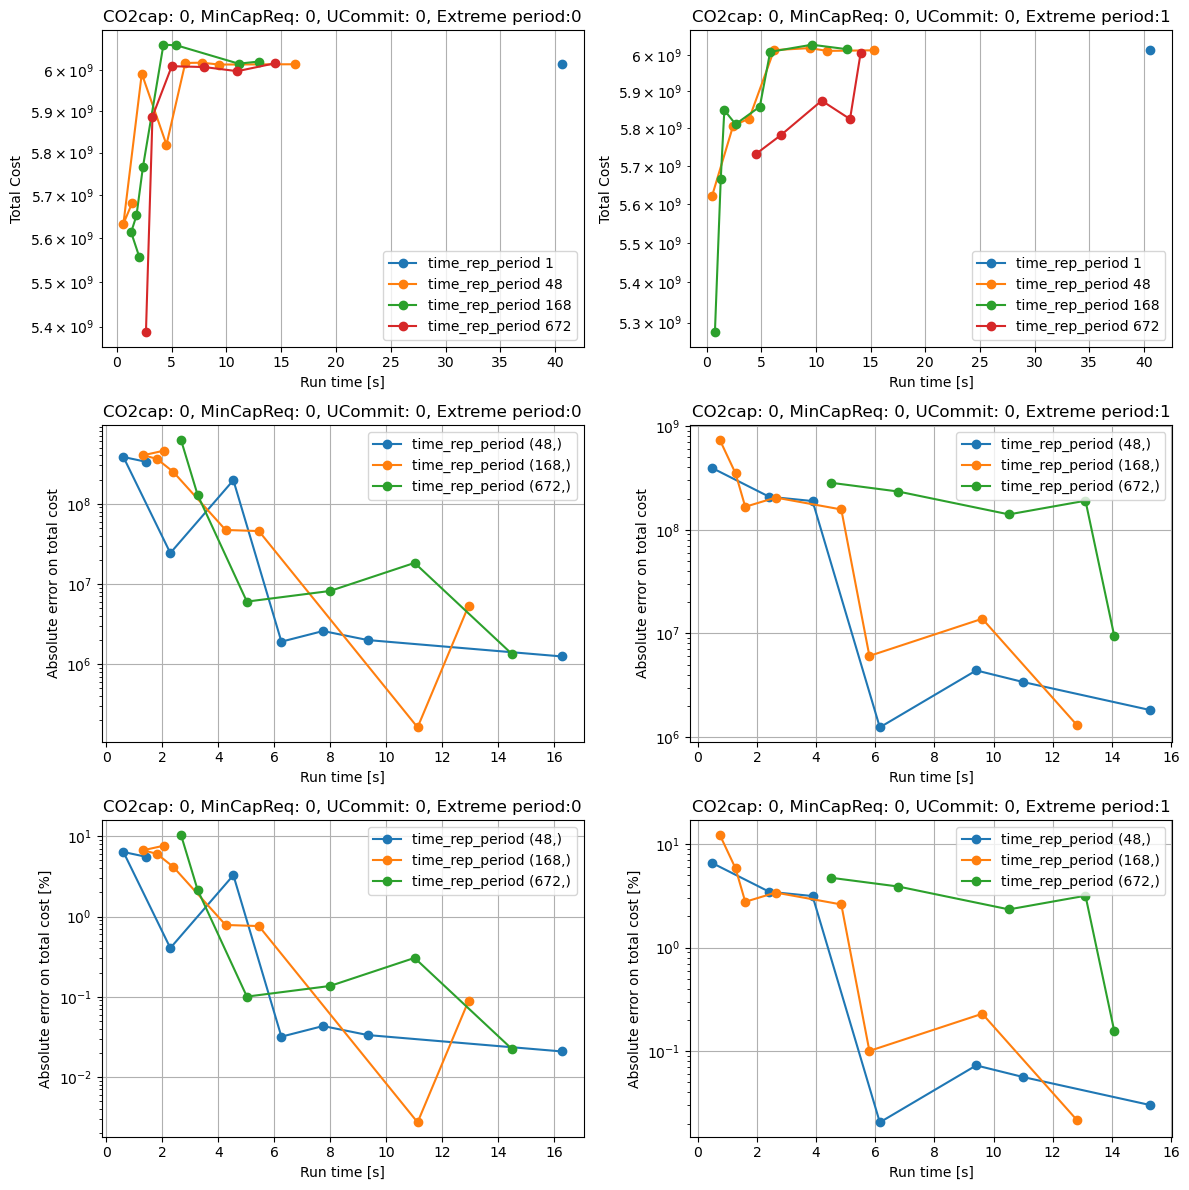

In [162]:
grouped = df_system_full_settings_results.groupby(by=["time_rep_period"])

fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            ax[0, 0].plot(
            group_df_extreme["Run_time"], 
            group_df_extreme["total_cost"], 
            marker='o', linestyle='-', 
            label=f"time_rep_period {group_name[0]}"
            )

            ax[0, 1].plot(
            group_df_extreme["Run_time"], 
            group_df_extreme["total_cost"], 
            marker='o', linestyle='-', 
            label=f"time_rep_period {group_name[0]}"
            )
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[0, i].plot(
                group_df_ordered["Run_time"], 
                group_df_ordered["total_cost"], 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name[0]}"
            )
    
            ax[0, i].set_xlabel('Run time [s]')
            ax[0, i].set_ylabel('Total Cost')
            ax[0, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[0, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[0, i].legend()
            ax[0, i].grid()

total_cost_ground_truth = df_system_full_settings_results[df_system_full_settings_results["time_rep_period"] == 1]["total_cost"]

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            continue
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[1, i].plot(
                group_df_ordered["Run_time"], 
                np.abs(group_df_ordered["total_cost"]-total_cost_ground_truth), 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name}"
            )
    
            ax[1, i].set_xlabel('Run time [s]')
            ax[1, i].set_ylabel('Absolute error on total cost')
            ax[1, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[1, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[1, i].legend()
            ax[1, i].grid()

for group_name, group_df in grouped:
    grouped_Extreme_period = group_df.groupby(by="ExtremePeriod")
    for group_name_extreme, group_df_extreme in grouped_Extreme_period:
        if group_name_extreme == 2:
            continue
        else:
            group_df_ordered = group_df_extreme.sort_values(by=["number_rep_period"], ascending=True)
            i = group_name_extreme
            ax[2, i].plot(
                group_df_ordered["Run_time"], 
                np.abs(group_df_ordered["total_cost"]-total_cost_ground_truth)/total_cost_ground_truth*100, 
                marker='o', linestyle='-', 
                label=f"time_rep_period {group_name}"
            )
    
            ax[2, i].set_xlabel('Run time [s]')
            ax[2, i].set_ylabel('Absolute error on total cost [%]')
            ax[2, i].set_title("CO2cap: 0, MinCapReq: 0, UCommit: 0, Extreme period:{}".format(group_name_extreme))
            # Uncomment these lines if you want to use log scales
            ax[2, i].set_yscale("log")
            # ax.set_xscale("log")
            ax[2, i].legend()
            ax[2, i].grid()

plt.tight_layout()
plt.show()
